In [1]:
import codecs
import fnmatch
import glob
import json
import os
import re
from collections import Counter, defaultdict

import matplotlib.pyplot as plt
import numpy as np
import sentencepiece as spm
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
from wordcloud import WordCloud

In [2]:
def recursive_glob(base_path, ext):
    # recursive globbing is only available from 3.5>
    matches = []
    ext = "*.%s" % ext
    for root, dirnames, filenames in os.walk(base_path):
        for filename in fnmatch.filter(filenames, ext):
            matches.append(os.path.join(root, filename))
    return matches

## Prerequisite

First, check if a repository is really using chainer. I defined the repository to be using chainer if the repository included at least one statement to import chainer.

In [3]:
def has_pat(re_pat, paths):
    for path in paths:
        if os.path.islink(path):
            continue
        with open(path) as fin:
            text = fin.read()
        if re_pat.find(text):
            return True
    return False

cnt = 0
chainer_repos = []
for i in range(3715):
    if not has_pat(r"(import)|(from) *chainer", recursive_glob("repos/%d" % i,"py")):
        #print(i)
        cnt += 1
    else:
        chainer_repos.append(i)
print("# of repositories using chainer: %d" % cnt)

# of repositories using chainer: 163


## Statement counting

Let me now count occurance of functions/classes by matching to the name of fucntions. Function and class names are taken from [Chainer v4.1.0 reference](https://docs.chainer.org/en/v4.1.0/).
I matched by non-alphanumeric character + function/link name + parenthesis, it should be able to distinguish `leaky_relu` and `relu`. It cannot capture occasion where the program passes around function object.

In [4]:
def count(keywords, paths):
    re_pats = {k: re.compile("[^a-zA-Z0-9_]%s\(" % k) for k in keywords}
    counts = Counter({k: 0 for k in keywords})
    for path in paths:
        if os.path.islink(path):
            continue
        with open(path) as fin:
            text = fin.read()
        counts += Counter({
            k: len(pat.findall(text))
            for k, pat in re_pats.items()
        })
    return counts

In [5]:
function_names = [
    "clipped_relu",
    "crelu",
    "elu",
    "hard_sigmoid",
    "leaky_relu",
    "log_softmax",
    "lstm",
    "maxout",
    "prelu",
    "relu",
    "selu",
    "sigmoid",
    "slstm",
    "softmax",
    "softplus",
    "swish",
    "tanh",
    "tree_lstm",
    "broadcast",
    "broadcast_to",
    "cast",
    "concat",
    "copy",
    "depth2space",
    "dstack",
    "expand_dims",
    "flatten",
    "flip",
    "fliplr",
    "flipud",
    "get_item",
    "hstack",
    "im2col",
    "pad",
    "pad_sequence",
    "permutate",
    "repeat",
    "reshape",
    "resize_images",
    "rollaxis",
    "scatter_add",
    "select_item",
    "separate",
    "space2depth",
    "spatial_transformer_grid",
    "spatial_transformer_sampler",
    "split_axis",
    "squeeze",
    "stack",
    "swapaxes",
    "tile",
    "transpose",
    "transpose_sequence",
    "vstack",
    "where",
    "bilinear",
    "convolution_2d",
    "convolution_nd",
    "deconvolution_2d",
    "deconvolution_nd",
    "depthwise_convolution_2d",
    "dilated_convolution_2d",
    "embed_id",
    "linear",
    "local_convolution_2d",
    "n_step_bigru",
    "n_step_bilstm",
    "n_step_birnn",
    "n_step_gru",
    "n_step_lstm",
    "n_step_rnn",
    "shift",
    "accuracy",
    "binary_accuracy",
    "classification_summary",
    "f1_score",
    "precision",
    "r2_score",
    "recall",
    "absolute_error",
    "bernoulli_nll",
    "black_out",
    "connectionist_temporal_classification",
    "contrastive",
    "crf1d",
    "argmax_crf1d",
    "cross_covariance",
    "decov",
    "gaussian_kl_divergence",
    "gaussian_nll",
    "hinge",
    "huber_loss",
    "mean_absolute_error",
    "mean_squared_error",
    "negative_sampling",
    "sigmoid_cross_entropy",
    "softmax_cross_entropy",
    "squared_error",
    "triplet",
    "absolute",
    "arccos",
    "arcsin",
    "arctan",
    "arctan2",
    "argmax",
    "argmin",
    "average",
    "batch_inv",
    "batch_l2_norm_squared",
    "batch_matmul",
    "bias",
    "ceil",
    "clip",
    "cos",
    "cosh",
    "cumsum",
    "det",
    "batch_det",
    "erf",
    "erfc",
    "exp",
    "expm1",
    "fft",
    "fix",
    "fmod",
    "floor",
    "identity",
    "ifft",
    "inv",
    "linear_interpolate",
    "log",
    "log10",
    "log1p",
    "log2",
    "logsumexp",
    "matmul",
    "max",
    "maximum",
    "mean",
    "min",
    "minimum",
    "prod",
    "rsqrt",
    "scale",
    "sin",
    "sinh",
    "sign",
    "sqrt",
    "square",
    "squared_difference",
    "sum",
    "tanh",
    "tan",
    "tensordot",
    "dropout",
    "gaussian",
    "gumbel_softmax",
    "simplified_dropconnect",
    "zoneout",
    "batch_normalization",
    "batch_renormalization",
    "fixed_batch_normalization",
    "fixed_batch_renormalization",
    "layer_normalization",
    "local_response_normalization",
    "normalize",
    "average_pooling_2d",
    "average_pooling_nd",
    "max_pooling_2d",
    "max_pooling_nd",
    "roi_pooling_2d",
    "spatial_pyramid_pooling_2d",
    "unpooling_2d",
    "unpooling_nd",
    "upsampling_2d",
    "forget",
]
function_counts = []
for i in chainer_repos:
    cnt = count(function_names, recursive_glob("repos/%d" % i, "py"))
    function_counts.append(cnt)
    with open(os.path.join("repos", "%d" % i, "function_counts.json"), "w")  as fout:
        json.dump(cnt, fout, indent=2)

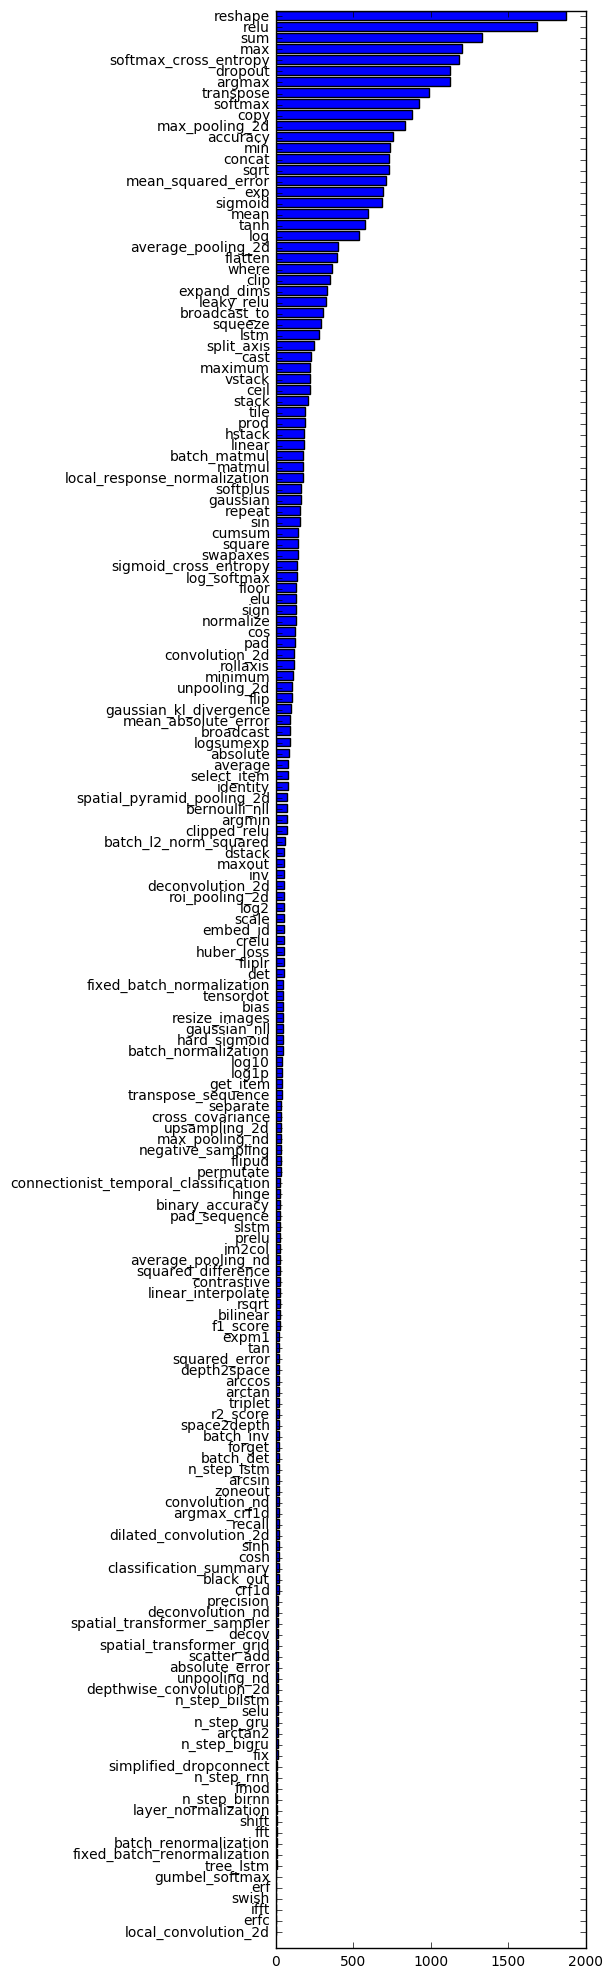

('erf', 4)
('swish', 3)
('ifft', 2)
('erfc', 1)
('local_convolution_2d', 1)


In [6]:
# this counts all the oocurance
# function_counts_sum = dict(sum(function_counts, Counter()))
function_counts_sum = dict(Counter(sum([list(fc.keys()) for fc in function_counts], [])))
function_counts_sum.update({k: 0 for k in function_names if k not in function_counts_sum})
function_keys_sorted = [k for k, _ in sorted(function_counts_sum.items(), key=lambda k_v: k_v[1])][::-1]#[:20]
plt.close()
plt.figure(figsize=(4, 25))
plt.barh(range(len(function_keys_sorted)), [function_counts_sum[k] for k in function_keys_sorted])
plt.yticks(np.arange(len(function_keys_sorted)) + 0.5, function_keys_sorted)
plt.ylim(len(function_keys_sorted) + 1, 0)
plt.show()
for k in function_keys_sorted[-5:]:
    print(k, function_counts_sum[k])

In [7]:
dataset_names = [
    "get_mnist",
    "get_fashion_mnist",
    "get_cifar10",
    "get_cifar100",
    "get_ptb_words",
    "get_svhn",
]
dataset_counts = []
for i in chainer_repos:
    cnt = count(dataset_names, recursive_glob("repos/%d" % i, "py"))
    dataset_counts.append(cnt)
    with open(os.path.join("repos", "%d" % i, "dataset_counts.json"), "w")  as fout:
        json.dump(cnt, fout, indent=2)

In [8]:
# Ratio of project using examples
sum([len(fc) > 0 for fc in dataset_counts]) / float(len(chainer_repos)) * 100


13.93581081081081

In [9]:
Counter(sum([list(fc.keys()) for fc in dataset_counts], []))

Counter({'get_cifar10': 125,
         'get_cifar100': 56,
         'get_fashion_mnist': 7,
         'get_mnist': 391,
         'get_ptb_words': 65,
         'get_svhn': 10})

In [10]:
links_names = [
    "Bias",
    "Bilinear",
    "ChildSumTreeLSTM",
    "Convolution2D",
    "ConvolutionND",
    "Deconvolution2D",
    "DeconvolutionND",
    "DepthwiseConvolution2D",
    "DilatedConvolution2D",
    "EmbedID",
    "GRU",
    "Highway",
    "Inception",
    "InceptionBN",
    "Linear",
    "LocalConvolution2D",
    "LSTM",
    "MLPConvolution2D",
    "NaryTreeLSTM",
    "NStepBiGRU",
    "NStepBiLSTM",
    "NStepBiRNNReLU",
    "NStepBiRNNTanh",
    "NStepGRU",
    "NStepLSTM",
    "NStepRNNReLU",
    "NStepRNNTanh",
    "Parameter",
    "Scale",
    "StatefulGRU",
    "StatelessGRU",
    "StatefulMGU",
    "StatelessMGU",
    "StatefulPeepholeLSTM",
    "StatefulZoneoutLSTM",
    "StatelessLSTM",
    "BatchNormalization",
    "BatchRenormalization",
    "LayerNormalization",
    "BinaryHierarchicalSoftmax",
    "BlackOut",
    "CRF1d",
    "SimplifiedDropconnect",
    "PReLU",
    "Swish",
    "Maxout",
    "NegativeSampling",
    "VGG16Layers",
    "GoogLeNet",
    "ResNet50Layers",
    "ResNet101Layers",
    "ResNet152Layers",]
links_counts = []
for i in chainer_repos:
    cnt = count(links_names, recursive_glob("repos/%d" % i, "py"))
    links_counts.append(cnt)
    with open(os.path.join("repos", "%d" % i, "links_counts.json"), "w")  as fout:
        json.dump(cnt, fout, indent=2)

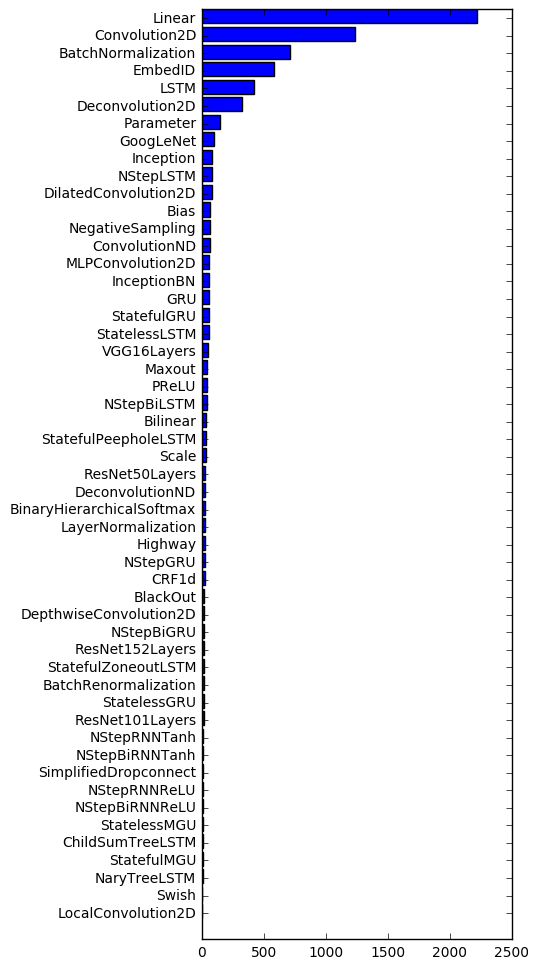

('ChildSumTreeLSTM', 8)
('StatefulMGU', 8)
('NaryTreeLSTM', 8)
('Swish', 3)
('LocalConvolution2D', 1)


In [11]:
links_counts_sum = Counter(sum([list(fc.keys()) for fc in links_counts], []))
links_counts_sum.update({k: 0 for k in links_names if k not in links_counts_sum})
links_keys_sorted = [k for k, _ in sorted(links_counts_sum.items(), key=lambda k_v: k_v[1])][::-1]#[:20]
plt.close()
plt.figure(figsize=(4, 12))
plt.barh(range(len(links_keys_sorted)), [links_counts_sum[k] for k in links_keys_sorted])
plt.yticks(np.arange(len(links_keys_sorted)) + 0.5, links_keys_sorted)
plt.ylim(len(links_keys_sorted) + 1, 0)
plt.show()

for k in links_keys_sorted[-5:]:
    print(k, links_counts_sum[k])

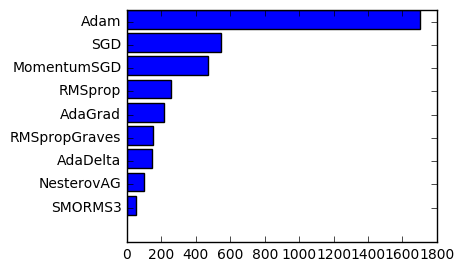

('AdaGrad', 214)
('RMSpropGraves', 150)
('AdaDelta', 147)
('NesterovAG', 101)
('SMORMS3', 50)


In [12]:
optimizer_names = [
    "AdaDelta",
    "AdaGrad",
    "Adam",
    "MomentumSGD",
    "NesterovAG",
    "RMSprop",
    "RMSpropGraves",
    "SGD",
    "SMORMS3",
]
optimizer_counts = []
for i in chainer_repos:
    cnt = count(optimizer_names, recursive_glob("repos/%d" % i, "py"))
    optimizer_counts.append(cnt)
    with open(os.path.join("repos", "%d" % i, "optimizers_counts.json"), "w")  as fout:
        json.dump(cnt, fout, indent=2)

optimizer_counts_sum = Counter(sum([list(fc.keys()) for fc in optimizer_counts], []))
optimizer_counts_sum.update({k: 0 for k in optimizer_names if k not in optimizer_counts_sum})
optimizers_keys_sorted = [k for k, _ in sorted(optimizer_counts_sum.items(), key=lambda k_v: k_v[1])][::-1]#[:20]
plt.close()
plt.figure(figsize=(4, 3))
plt.barh(range(len(optimizers_keys_sorted)), [optimizer_counts_sum[k] for k in optimizers_keys_sorted])
plt.yticks(np.arange(len(optimizers_keys_sorted)) + 0.5, optimizers_keys_sorted)
plt.ylim(len(optimizers_keys_sorted) + 1, 0)
plt.show()

for k in optimizers_keys_sorted[-5:]:
    print(k, optimizer_counts_sum[k])

In [13]:
function_link_comparison = [
    ["Bias", "bias"],
    ["Bilinear", "bilinear"],
    ["Convolution2D", "convolution_2d"],
    ["ConvolutionND", "convolution_nd"],
    ["Deconvolution2D", "deconvolution_2d"],
    ["DeconvolutionND", "deconvolution_nd"],
    ["DepthwiseConvolution2D", "depthwise_convolution_2d"],
    ["DilatedConvolution2D", "dilated_convolution_2d"],
    ["EmbedID", "embed_id"],
    ["Linear", "linear"],
    ["LocalConvolution2D", "local_convolution_2d"],
    ["LSTM", "lstm"],
    ["NaryTreeLSTM", "tree_lstm"],
    ["NStepBiGRU", "n_step_bigru"],
    ["NStepBiLSTM", "n_step_bilstm"],
    ["NStepBiRNNReLU", "n_step_birnn"],
    ["NStepBiRNNTanh", "___dummy___"],
    ["NStepGRU", "n_step_gru"],
    ["NStepLSTM", "n_step_lstm"],
    ["NStepRNNReLU", "n_step_rnn"],
    ["NStepRNNTanh", "___dummy___"],
    ["BatchNormalization", "batch_normalization"],
    ["BatchRenormalization", "batch_renormalization"],
    ["LayerNormalization", "layer_normalization"],
    ["BlackOut", "black_out"],
    ["CRF1d", "crf1d"],
    ["SimplifiedDropconnect", "simplified_dropconnect"],
    ["PReLU", "prelu"],
    ["Swish", "swish"],
    ["NegativeSampling", "negative_sampling"],
]

function_link_counts = []
for cnt_l, cnt_f  in zip(links_counts, function_counts):
    function_link_counts.append([[l in cnt_l, f in cnt_f] for l, f in function_link_comparison])


In [14]:
function_link_counts_sum = np.sum(function_link_counts, axis=0)
print("Macro平均でLinksが選ばれる確率: %0.3f" % np.average(function_link_counts_sum[:, 0] / function_link_counts_sum.sum(1).astype(float)))
print("Macro平均でfunctionsが選ばれる確率: %0.3f" % np.average(function_link_counts_sum[:, 1] / function_link_counts_sum.sum(1).astype(float)))
print("Micro平均でLinksが選ばれる確: %0.3f" % (function_link_counts_sum.sum(0) / function_link_counts_sum.sum().astype(float))[0])
print("Micro平均でfunctionsが選ばれる確率: %0.3f" % (function_link_counts_sum.sum(0) / function_link_counts_sum.sum().astype(float))[1])
print("\n\nLink\tFunction\tLink\tFunction")
for l, c in zip(function_link_comparison, function_link_counts_sum):
    print("%s\t%s\t%d\t%d" % (l[0], l[1], c[0], c[1]))

Macro平均でLinksが選ばれる確率: 0.689
Macro平均でfunctionsが選ばれる確率: 0.311
Micro平均でLinksが選ばれる確: 0.849
Micro平均でfunctionsが選ばれる確率: 0.151


Link	Function	Link	Function
Bias	bias	70	47
Bilinear	bilinear	36	26
Convolution2D	convolution_2d	1232	118
ConvolutionND	convolution_nd	63	19
Deconvolution2D	deconvolution_2d	328	56
DeconvolutionND	deconvolution_nd	28	17
DepthwiseConvolution2D	depthwise_convolution_2d	21	14
DilatedConvolution2D	dilated_convolution_2d	81	19
EmbedID	embed_id	582	54
Linear	linear	2219	186
LocalConvolution2D	local_convolution_2d	1	1
LSTM	lstm	420	280
NaryTreeLSTM	tree_lstm	8	8
NStepBiGRU	n_step_bigru	19	13
NStepBiLSTM	n_step_bilstm	39	14
NStepBiRNNReLU	n_step_birnn	12	12
NStepBiRNNTanh	___dummy___	12	0
NStepGRU	n_step_gru	24	13
NStepLSTM	n_step_lstm	83	21
NStepRNNReLU	n_step_rnn	12	12
NStepRNNTanh	___dummy___	13	0
BatchNormalization	batch_normalization	712	45
BatchRenormalization	batch_renormalization	17	8
LayerNormalization	layer_normalization	26	9
BlackOut	black_out	21	19
CRF1d	crf1d	23

In [15]:
class_names = []
for i in chainer_repos:
    class_name_repo = set()
    for path in recursive_glob("repos/%d" % i, "py"):
        if os.path.islink(path):
            continue
        with open(path) as fin:
            text = fin.read()
        for m in list(re.findall(r"class ([a-zA-Z][a-zA-Z0-9]*) *\([^\)a-zA-Z0-9_]*Chain", text)):
            class_name_repo.add(m)
        for m in list(re.findall(r"class ([a-zA-Z][a-zA-Z0-9]*) *\([^\)a-zA-Z0-9_]*Link", text)):
            class_name_repo.add(m)
    class_names.extend(list(class_name_repo))
class_names

['CNN',
 'MLP',
 'MyChain',
 'Classifier',
 'RNN',
 'GEINet',
 'Model',
 'SkipGram',
 'Network',
 'MyNetwork',
 'Regression',
 'MyChain',
 'MyChain',
 'MyChainList',
 'NChainList',
 'PBLLogi',
 'LetterClassifyer',
 'RNN',
 'MinibatchDiscrimination',
 'Gaussian',
 'MyChain',
 'RNN',
 'MyChainLSTM',
 'MyChainBiDirectionalLSTM',
 'MyChainLSTM3',
 'MyChainLSTM2',
 'MaskEstimator',
 'MyChain',
 'LSTM',
 'MyChain',
 'IrisChain',
 'ImgMotLSTM',
 'MyModel',
 'IrisChain',
 'IrisLogi',
 'ActionValue',
 'Neuralnet',
 'NN',
 'CNN',
 'MLP',
 'DQN',
 'SimpleLstmNet',
 'SimpleCnnNet',
 'AttentionNet',
 'GrobalAttention',
 'FastQrnnNet',
 'QRNNLayer',
 'NstepLstmNet',
 'BiNstepLstm',
 'Q',
 'XorChain',
 'OrChain',
 'AndChain',
 'ChainList',
 'Chain',
 'SubsamplingBlock',
 'ProjectionShortcutBlock',
 'ResNet',
 'PaddingShortcutBlock',
 'IdentityShortcutBlock',
 'Group',
 'BasicBlock',
 'Model',
 'Discriminator',
 'Generator',
 'DisMLP',
 'GenMLP',
 'MlpNet',
 'SimplePerceptron',
 'ThreePerceptron',
 'C

In [16]:
# Tokenize  class names
with open("function_names.txt", "w") as fout:
    for c in class_names:
        fout.write(c + "\n")

spm.SentencePieceTrainer.Train('--input=function_names.txt --model_prefix=sentence_piece --vocab_size=2000 --hard_vocab_limit=false')

sp = spm.SentencePieceProcessor()
sp.Load("sentence_piece.model")

tokens = []
with open("function_names.txt") as fin:
    for line in fin:
        for t in sp.EncodeAsPieces(line.strip()):
            tokens.append(t.strip('\xe2\x96\x81'))

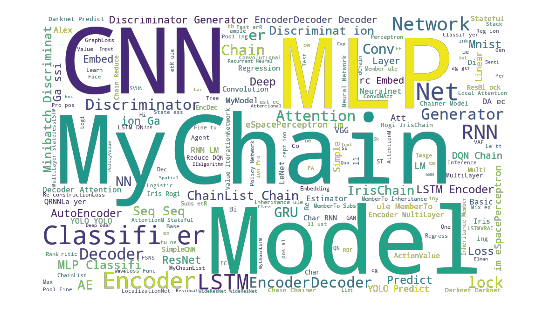

In [17]:
text = " ".join(tokens)
# Generate a word cloud image
wordcloud = WordCloud(height=600, width=1000, background_color=None, mode="RGBA").generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.close()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
wordcloud.to_file("function_name_wordcloud.png")
plt.show()

In [18]:
nlp_related = [
    "ChildSumTreeLSTM",
    "GRU",
    "LSTM",
    "NaryTreeLSTM",
    "NStepBiGRU",
    "NStepBiLSTM",
    "NStepBiRNNReLU",
    "NStepBiRNNTanh",
    "NStepGRU",
    "NStepLSTM",
    "NStepRNNReLU",
    "NStepRNNTanh",
    "StatefulGRU",
    "StatelessGRU",
    "StatefulMGU",
    "StatelessMGU",
    "StatefulPeepholeLSTM",
    "StatefulZoneoutLSTM",
    "StatelessLSTM",
]
image_related = [
    "Convolution2D",
    "ConvolutionND",
    "Deconvolution2D",
    "DeconvolutionND",
    "DepthwiseConvolution2D",
    "DilatedConvolution2D",
    "Inception",
    "InceptionBN",
    "LocalConvolution2D",
    "MLPConvolution2D",
    "VGG16Layers",
    "GoogLeNet",
    "ResNet50Layers",
    "ResNet101Layers",
    "ResNet152Layers"
]

image_related_cnt = 0
nlp_related_cnt = 0
neighter_cnt = 0
for cnt_l in links_counts:
    is_nlp = any((l in cnt_l for l in nlp_related))
    if is_nlp:
        nlp_related_cnt += 1
    is_image = any((l in cnt_l for l in image_related))
    if is_image:
        image_related_cnt += 1
    if not is_nlp and not is_image:
        neighter_cnt += 1

print("Repositories using CNN: %d" % image_related_cnt)
print("Repositories using RNN: %d" % nlp_related_cnt)
print("Repositories using Neighter: %d" % neighter_cnt)

Repositories using CNN: 1311
Repositories using RNN: 499
Repositories using Neighter: 1911


In [19]:
old_style_lstm = [
    "GRU",
    "LSTM",
    "StatefulGRU",
    "StatelessGRU",
    "StatefulMGU",
    "StatelessMGU",
    "StatefulPeepholeLSTM",
    "StatefulZoneoutLSTM",
    "StatelessLSTM",
    "lstm",
]
new_style_lstm = [
    "NStepBiGRU",
    "NStepBiLSTM",
    "NStepBiRNNReLU",
    "NStepBiRNNTanh",
    "NStepGRU",
    "NStepLSTM",
    "NStepRNNReLU",
    "NStepRNNTanh",
    "n_step_bigru",
    "n_step_bilstm",
    "n_step_birnn",
    "n_step_gru",
    "n_step_lstm",
    "n_step_rnn",
]

old_style_cnt = 0
new_style_cnt = 0
both_cnt = 0
for cnt_l, cnt_f in zip(links_counts, function_counts):
    has_old_style_lstm = any((l in cnt_l for l in old_style_lstm)) or any((l in cnt_f for l in old_style_lstm))
    if has_old_style_lstm:
        old_style_cnt += 1
    has_new_style_lstm = any((l in cnt_l for l in new_style_lstm)) or any((l in cnt_f for l in new_style_lstm))
    if has_new_style_lstm:
        new_style_cnt += 1
    if has_old_style_lstm and has_new_style_lstm:
        both_cnt += 1

print("Repositories using old-style LSTM: %d" % old_style_cnt)
print("Repositories using new-style LSTM: %d" % new_style_cnt)
print("Repositories using both (why?): %d" % both_cnt)

Repositories using old-style LSTM: 572
Repositories using new-style LSTM: 107
Repositories using both (why?): 65


## READMEまわり

In [20]:
def analyze_readme(repo_paths):
    cnt_has_readme = 0
    langs = []
    lengths = []
    for repo_path in repo_paths:
        readme_path = None
        for path in glob.glob(glob.glob(repo_path + "/*/")[0] + "*"):
            if "readme" in path.lower() and os.path.isfile(path):
                readme_path = path
                break
        if readme_path is not None:
            if os.path.islink(readme_path):
                continue
            with codecs.open(readme_path, encoding="utf-8") as fin:
                text = fin.read()
            if len(text) > 0:
                cnt_has_readme += 1
                try:
                    l = detect(text)
                except LangDetectException:
                    l = None
                langs.append(l)
                lengths.append(len(text))
    return cnt_has_readme, langs, lengths

cnt_has_readme_chainer, langs_chainer, lengths_chainer = analyze_readme(["repos/%d" % i for i in chainer_repos])
ratio_has_readme_chainer = cnt_has_readme_chainer / float(len(chainer_repos))

cnt_has_readme_tensorflow, langs_tensorflow, lengths_tensorflow = analyze_readme(glob.glob("repos_tensorflow/*"))
ratio_has_readme_tensorflow = cnt_has_readme_tensorflow / float(len(glob.glob("repos_tensorflow/*")))

cnt_has_readme_pytorch, langs_pytorch, lengths_pytorch = analyze_readme(glob.glob("repos_pytorch/*"))
ratio_has_readme_pytorch = cnt_has_readme_pytorch / float(len(glob.glob("repos_pytorch/*")))


In [21]:
ratio_has_readme_chainer, ratio_has_readme_tensorflow, ratio_has_readme_pytorch

(0.7238175675675675, 0.8757763975155279, 0.9010416666666666)

In [22]:
np.average([l == "en" for l in langs_chainer]), np.average([l == "en" for l in langs_tensorflow]), np.average([l == "en" for l in langs_pytorch])

(0.77440684558537531, 0.95744680851063835, 0.97687861271676302)

In [23]:
np.average(lengths_chainer), np.average(lengths_tensorflow), np.average(lengths_pytorch)

(1684.7740178918709, 6874.2198581560287, 4168.1907514450868)

In [24]:
names = defaultdict(int)

for i in chainer_repos:
    with open(os.path.join("repos", "%d" % i, "api.json")) as fin:
        api_json = json.load(fin)
    names[api_json["owner"]["login"]] += 1
print("unique users: ", len(names))
print("repo per user: ", np.average(names.values()))
print("Users with only one chainer repo: ", np.average(np.array(names.values()) == 1))

('unique users: ', 2283)
('repo per user: ', 1.5558475689881734)
('Users with only one chainer repo: ', 0.77398160315374509)


In [25]:
def count_stars(paths):
    n_stars = []
    for path in paths:
        with open(os.path.join(path, "api.json")) as fin:
            api_json = json.load(fin)
        n_stars.append(api_json["stargazers_count"])
    return n_stars


print(
    np.average(count_stars("repos/%d" % i for i in chainer_repos)),
    np.average(count_stars(glob.glob("repos_tensorflow/*"))),
    np.average(count_stars(glob.glob("repos_pytorch/*"))))

print(
    np.median(count_stars("repos/%d" % i for i in chainer_repos)),
    np.median(count_stars(glob.glob("repos_tensorflow/*"))),
    np.median(count_stars(glob.glob("repos_pytorch/*"))))


(47.632882882882882, 252.19875776397515, 153.85416666666666)
(0.0, 17.0, 18.5)
